# Homework w06d04 - Natural Language Processing

Load the stumbleupon dataset. It contains the title, the body and the alchemy category of documents. In this exercise, the aim is to use text classification trained on the fetch20_newsgroups dataset to assign one of its classes to each title and body in the stumbleupon dataset. 

This time, the true labels for the stambleupon dataset are unknown, so one has to check if the predictions make sense.  
   
   1. Determine in how many cases the prediction for the body agrees with the prediction for the title. 
   
   1. Check if there is a strong correlation between the alchemy category and the predicted label (at least where the names suggest such a relation).
   
   1. Classify a few texts by direct inspection. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

#### Load the stumbleupon dataset

In [2]:
df = pd.read_csv('stumbleupon.tsv', sep='\t')
df['title'] = df.boilerplate.map(lambda x: json.loads(x).get('title', ''))
df['body'] = df.boilerplate.map(lambda x: json.loads(x).get('body', ''))
df.dropna(inplace=True)
df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


In [3]:
df.shape

(7327, 29)

#### Import the fetch_20newsgroups dataset. Use all categories or a subset.

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

data_train = fetch_20newsgroups(subset='train', 
                                categories=fetch_20newsgroups(subset='train').target_names,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

data_test = fetch_20newsgroups(subset='test', 
                               categories=fetch_20newsgroups(subset='train').target_names,#categories,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))

#### Check which data_train.target_names and which alchemy category could be a good match.

In [5]:
data_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
list(df.alchemy_category.unique())

['business',
 'recreation',
 'health',
 'sports',
 '?',
 'arts_entertainment',
 'science_technology',
 'gaming',
 'culture_politics',
 'computer_internet',
 'law_crime',
 'religion',
 'weather',
 'unknown']

#### Apply a Tfidf Vectorizer to the fetch_20newsgroups training set and train a logistic regression model on it. Check its accuracy on the fetch_20newsgroups test set. 

In [7]:
tf = TfidfVectorizer(stop_words='english',
                     sublinear_tf=True,max_df=0.5,max_features=1000)
tf.fit(data_train['data'])
len(tf.get_feature_names())

1000

In [8]:
#names = data_train['target_names']

In [9]:
model = make_pipeline(TfidfVectorizer(stop_words='english',
                                      sublinear_tf=True,
                                      max_df=0.5,
                                      max_features=1000),
                      LogisticRegression(),
                      )

y_train = data_train['target']
y_test = data_test['target']

model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print accuracy_score(y_test, y_pred)
print "Number of features:", len(model.steps[0][1].get_feature_names())

0.532262347318
Number of features: 1000


In [10]:
def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in xrange(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df
docm(y_test, y_pred, data_train.target_names)

,p_alt.atheism,p_comp.graphics,p_comp.os.ms-windows.misc,p_comp.sys.ibm.pc.hardware,p_comp.sys.mac.hardware,p_comp.windows.x,p_misc.forsale,p_rec.autos,p_rec.motorcycles,p_rec.sport.baseball,p_rec.sport.hockey,p_sci.crypt,p_sci.electronics,p_sci.med,p_sci.space,p_soc.religion.christian,p_talk.politics.guns,p_talk.politics.mideast,p_talk.politics.misc,p_talk.religion.misc
alt.atheism,110,4,0,1,2,3,1,3,16,7,3,3,10,26,22,67,9,12,10,10
comp.graphics,6,231,26,15,10,26,5,3,15,6,0,3,19,11,12,1,0,0,0,0
comp.os.ms-windows.misc,4,24,218,38,19,22,1,2,19,5,0,2,8,13,12,2,2,0,2,1
comp.sys.ibm.pc.hardware,0,18,34,185,44,6,20,2,11,3,3,6,45,7,4,0,2,1,1,0
comp.sys.mac.hardware,3,14,9,53,196,5,15,10,22,5,2,0,31,10,8,0,1,0,0,1
comp.windows.x,0,43,34,6,9,234,7,5,18,5,0,5,17,5,4,0,1,1,1,0
misc.forsale,0,4,5,22,15,2,285,12,16,6,1,1,8,4,5,1,1,0,1,1
rec.autos,8,3,5,3,11,6,9,212,52,12,1,1,27,14,6,4,9,1,9,3
rec.motorcycles,9,3,3,7,7,3,11,36,208,20,4,3,23,17,8,5,13,3,11,4
rec.sport.baseball,8,7,1,1,0,0,7,9,35,203,74,2,13,13,7,4,1,4,8,0


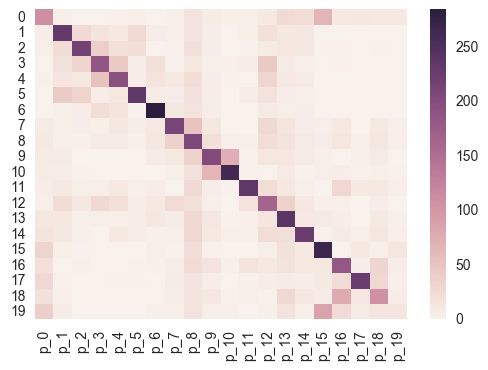

In [11]:
sns.heatmap(docm(y_test, y_pred))

In [13]:
docm(y_test, y_pred)

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12,p_13,p_14,p_15,p_16,p_17,p_18,p_19
0,110,4,0,1,2,3,1,3,16,7,3,3,10,26,22,67,9,12,10,10
1,6,231,26,15,10,26,5,3,15,6,0,3,19,11,12,1,0,0,0,0
2,4,24,218,38,19,22,1,2,19,5,0,2,8,13,12,2,2,0,2,1
3,0,18,34,185,44,6,20,2,11,3,3,6,45,7,4,0,2,1,1,0
4,3,14,9,53,196,5,15,10,22,5,2,0,31,10,8,0,1,0,0,1
5,0,43,34,6,9,234,7,5,18,5,0,5,17,5,4,0,1,1,1,0
6,0,4,5,22,15,2,285,12,16,6,1,1,8,4,5,1,1,0,1,1
7,8,3,5,3,11,6,9,212,52,12,1,1,27,14,6,4,9,1,9,3
8,9,3,3,7,7,3,11,36,208,20,4,3,23,17,8,5,13,3,11,4
9,8,7,1,1,0,0,7,9,35,203,74,2,13,13,7,4,1,4,8,0


#### Now apply a Tfidf Vectorizer to the titles and the body of the stumbleupon dataset and obtain a class prediction for each title and body.

In [14]:
tf.fit_transform(df.title)

<7327x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 23034 stored elements in Compressed Sparse Row format>

In [15]:
tf.fit_transform(df.title[:3]).todense()[0:2,0:2]

matrix([[ 0.        ,  0.37796447],
        [ 0.35355339,  0.        ]])

In [16]:
# predict newsgroup classes for titles and bodies
df['title_pred'] = model.predict(df.title)
df['body_pred'] = model.predict(df.body)   
df['title_pred_labels'] = [data_train.target_names[x] for x in df.title_pred]
df['body_pred_labels'] = [data_train.target_names[x] for x in df.body_pred]

In [17]:
df[['alchemy_category','title_pred_labels','body_pred_labels']].head(20)

,alchemy_category,title_pred_labels,body_pred_labels
0,business,comp.sys.ibm.pc.hardware,sci.electronics
1,recreation,talk.politics.guns,talk.politics.guns
2,health,talk.politics.misc,sci.med
3,health,rec.sport.baseball,sci.med
4,sports,talk.politics.guns,rec.sport.hockey
5,?,rec.motorcycles,sci.med
6,arts_entertainment,talk.politics.misc,talk.politics.misc
7,?,talk.politics.guns,sci.med
8,?,rec.sport.baseball,rec.sport.baseball
9,?,rec.motorcycles,rec.autos


#### Text classification examples:

In [18]:
# function printing document and assigned class
def my_classifier(my_list):
    my_pred = model.predict(my_list)
    preds = [data_train.target_names[pred] for pred in my_pred]
    return zip(my_list,preds)

# print function
def my_printer(my):
    for i in range(len(my)):
        print 'Document: '
        print my[i][0]
        print 'Assigned class: '
        print my[i][1]
        print

In [19]:
# single words
my_list = ['men','women','tree','shark','computer','internet','star',
               'quantum','magnet','english','swimming','horse','rain']
my = my_classifier(my_list)

In [20]:
my_printer(my)

Document: 
men
Assigned class: 
talk.politics.misc

Document: 
women
Assigned class: 
alt.atheism

Document: 
tree
Assigned class: 
rec.motorcycles

Document: 
shark
Assigned class: 
rec.motorcycles

Document: 
computer
Assigned class: 
comp.graphics

Document: 
internet
Assigned class: 
sci.electronics

Document: 
star
Assigned class: 
rec.motorcycles

Document: 
quantum
Assigned class: 
rec.motorcycles

Document: 
magnet
Assigned class: 
rec.motorcycles

Document: 
english
Assigned class: 
rec.motorcycles

Document: 
swimming
Assigned class: 
rec.motorcycles

Document: 
horse
Assigned class: 
rec.motorcycles

Document: 
rain
Assigned class: 
rec.motorcycles



In [21]:
# A part of a guardian article on politics 
politics = ['Ministers have dropped plans to curb the power of the House of Lords, amid concerns it could cause tensions between the government and peers before crucial Brexit legislation has to pass through parliament.']
my = my_classifier(politics)
my_printer(my)

Document: 
Ministers have dropped plans to curb the power of the House of Lords, amid concerns it could cause tensions between the government and peers before crucial Brexit legislation has to pass through parliament.
Assigned class: 
talk.politics.misc



In [22]:
# A part of a guardian article on technology
technology = ['The Tesla CEO, Elon Musk, is planning to put more than 4,000 satellites in orbit in order to blanket the Earth with internet access. SpaceX, the privateer space company led by Musk, is requesting permission from the US government to operate a massive network of 4,425 satellites - plus “in-orbit spares” - to provide high-speed, global internet coverage. Documents filed with the US Federal Communications Commission (FCC) on Tuesday propose an initial launch of 800 satellites to create an orbiting digital communications array to cover the US, including Puerto Rico and the US Virgin Islands.']
my = my_classifier(technology)
my_printer(my)

Document: 
The Tesla CEO, Elon Musk, is planning to put more than 4,000 satellites in orbit in order to blanket the Earth with internet access. SpaceX, the privateer space company led by Musk, is requesting permission from the US government to operate a massive network of 4,425 satellites - plus “in-orbit spares” - to provide high-speed, global internet coverage. Documents filed with the US Federal Communications Commission (FCC) on Tuesday propose an initial launch of 800 satellites to create an orbiting digital communications array to cover the US, including Puerto Rico and the US Virgin Islands.
Assigned class: 
sci.space



In [23]:
# The abstract of a physics paper
science = ['In the classical theory black holes can only absorb and not emit particles. However it is shown that quantum mechanical effects cause black holes to create and emit particles as if they were hot bodies with temperature where kappa is the surface gravity of the black hole. This thermal emission leads to a slow decrease in the mass of the black hole and to its eventual disappearance: any primordial black hole of mass less than about 1015 g would have evaporated by now. Although these quantum effects violate the classical law that the area of the event horizon of a black hole cannot decrease, there remains a Generalized Second Law:S+A/4 never decreases whereS is the entropy of matter outside black holes andA is the sum of the surface areas of the event horizons. This shows that gravitational collapse converts the baryons and leptons in the collapsing body into entropy. It is tempting to speculate that this might be the reason why the Universe contains so much entropy per baryon.']
my = my_classifier(science)
my_printer(my)

Document: 
In the classical theory black holes can only absorb and not emit particles. However it is shown that quantum mechanical effects cause black holes to create and emit particles as if they were hot bodies with temperature where kappa is the surface gravity of the black hole. This thermal emission leads to a slow decrease in the mass of the black hole and to its eventual disappearance: any primordial black hole of mass less than about 1015 g would have evaporated by now. Although these quantum effects violate the classical law that the area of the event horizon of a black hole cannot decrease, there remains a Generalized Second Law:S+A/4 never decreases whereS is the entropy of matter outside black holes andA is the sum of the surface areas of the event horizons. This shows that gravitational collapse converts the baryons and leptons in the collapsing body into entropy. It is tempting to speculate that this might be the reason why the Universe contains so much entropy per baryon

#### Choose three text bodies from the stumbleupon dataset and assign one of the fetch_20newsgroups class labels to it. Does your classification match your prediction?

In [24]:
for n in  [10,100,5000]:
    print df.body[n]
    print "Alchemy category: ", df.alchemy_category[n]
    print "Predicted category: ", data_train.target_names[df.body_pred[n]]
    print 

Faced with a stream of financial scandals the public is growing impatient with the slow pace of change Some pundits want to clear out the entire old guard and break up the banks While something must be done these knee jerk approaches are not the best way forward Full Article reuters.com brings you the latest news from around the world, covering breaking news in business, politics, entertainment, technology, and more in video and pictures. breaking news, world news, video news, investing, financial information, business news, rueters, roiters
Alchemy category:  business
Predicted category:  talk.politics.guns

Succulent grilled pork chops with rich creamy melted blue cheese ready in less than 30 minutes Difficulty and servings Serves 4 Preparation and cooking times Ready in 20 30 minutes 467 kcalories protein 35g carbohydrate 7g fat 34 g saturated fat 15g fibre 0g sugar 5g salt 0 82 g Recipe from Good Food magazine October 2003 Want to share this recipe with your family and friends Clic

#### For how many titles and text bodies the prediction agrees?

In [25]:
(df.title_pred==df.body_pred).sum()/float(len(df))

0.24853282380237479

#### How does the prediction compare with the alchemy category? Check for at least three alchemy categories.

In [26]:
# frequencies of fetch_20newsgroups dataset classes
pd.Series(y_train).value_counts()/float(len(y_train))

10    0.053032
15    0.052943
8     0.052855
9     0.052766
11    0.052590
13    0.052501
7     0.052501
14    0.052413
5     0.052413
12    0.052236
2     0.052236
3     0.052148
6     0.051706
1     0.051617
4     0.051087
17    0.049850
16    0.048259
0     0.042425
18    0.041100
19    0.033322
dtype: float64

In [27]:
# frequencies of alchemy categories
print df.alchemy_category.value_counts()/float(len(df))

?                     0.315955
recreation            0.166507
arts_entertainment    0.127337
business              0.118329
health                0.069060
sports                0.051726
culture_politics      0.046131
computer_internet     0.040262
science_technology    0.038897
gaming                0.010373
religion              0.009827
law_crime             0.004231
unknown               0.000819
weather               0.000546
Name: alchemy_category, dtype: float64


In [28]:
# classifications of particular alchemy categories
for alchemy in df.alchemy_category.unique():
    print alchemy, "(frequency: ", 
    print len(df[df.alchemy_category==alchemy])/float(len(df)), ")"
    print df.title_pred_labels[df.alchemy_category==alchemy
                              ].value_counts()/float(
        len(df[df.alchemy_category==alchemy]))
    print

business (frequency:  0.118329466357 )
rec.motorcycles             0.454441
sci.med                     0.110727
talk.politics.guns          0.073818
rec.sport.baseball          0.063437
sci.electronics             0.043829
comp.sys.mac.hardware       0.043829
misc.forsale                0.025375
rec.autos                   0.024221
talk.politics.misc          0.023068
sci.crypt                   0.023068
rec.sport.hockey            0.017301
comp.windows.x              0.014994
sci.space                   0.013841
talk.politics.mideast       0.012687
comp.sys.ibm.pc.hardware    0.011534
alt.atheism                 0.011534
soc.religion.christian      0.011534
comp.graphics               0.010381
talk.religion.misc          0.005767
comp.os.ms-windows.misc     0.004614
Name: title_pred_labels, dtype: float64

recreation (frequency:  0.166507438242 )
rec.motorcycles             0.438525
sci.med                     0.124590
talk.politics.guns          0.078689
rec.sport.baseball          

In [29]:
for alchemy in df.alchemy_category.unique():
    print alchemy, "(frequency: ", 
    print len(df[df.alchemy_category==alchemy])/float(len(df)), ")"
    print df.body_pred_labels[df.alchemy_category==alchemy
                              ].value_counts()/float(
        len(df[df.alchemy_category==alchemy]))
    print

business (frequency:  0.118329466357 )
sci.med                     0.276817
sci.electronics             0.245675
rec.motorcycles             0.115340
misc.forsale                0.059977
rec.sport.baseball          0.058824
rec.autos                   0.044983
sci.space                   0.041522
talk.politics.misc          0.028835
comp.sys.mac.hardware       0.028835
rec.sport.hockey            0.020761
comp.graphics               0.016148
sci.crypt                   0.014994
comp.windows.x              0.013841
alt.atheism                 0.010381
soc.religion.christian      0.005767
talk.politics.mideast       0.004614
talk.politics.guns          0.004614
comp.sys.ibm.pc.hardware    0.004614
talk.religion.misc          0.003460
Name: body_pred_labels, dtype: float64

recreation (frequency:  0.166507438242 )
sci.med                     0.274590
sci.electronics             0.173770
rec.motorcycles             0.133607
rec.sport.baseball          0.072951
rec.autos                   0